# Set-up

## Imports

In [2]:
# Standard
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from tqdm.notebook import trange
import plotly.graph_objects as go

# Sci-kit learn imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, f1_score, matthews_corrcoef, PrecisionRecallDisplay
import joblib

## Parameters

In [53]:
scope = 'BID'
train_year = 2021


input_path = f'../data/2_processed/ML_dataset_{scope}.pkl'

train_years = [train_year]
test_years = [test_year for test_year in [2019, 2020, 2021, 2022] if test_year > train_year]

subsample_size = None

target = 'Result'

features_to_encode = [
    'MargTech',
    'WorkDay',
    'Prov',
    'Tech',
]

other_features = [
    'hour',
    'SC_PC1',
    'SC_PC2',
    'IN_PC1',
    'IN_PC2',
    'CT_PC1',
    'CT_PC2',
    'PurchMGP',
    'SellMGP',
    'SolarAngle',
    'DeclAngle',
    'PVnew',
    'PriceDiff',
    'Qty'
]

features = other_features + features_to_encode

# Main

## Preprocessing

In [54]:
input_df = pd.read_pickle(input_path)
input_df

,hour,date,year,unit,scope,SC_PC1,SC_PC2,IN_PC1,IN_PC2,CT_PC1,...,WorkDay,Prov,Tech,PVold,PVnew,Price,PriceDiff,Result,RatioAcc,Qty
2018010118UP_ALTOADDA_1_BID,18,20180101,2018,UP_ALTOADDA_1,BID,2.083112,0.480035,-1.932233,-0.782315,1.912031,...,holiday,Milano,Hydro Run-of-river and poundage,0.095,0.095,26.22,-0.349,False,0.000000,22.000
2018010119UP_ALTOADDA_1_BID,19,20180101,2018,UP_ALTOADDA_1,BID,1.249924,0.598779,-1.772487,-0.866850,0.891173,...,holiday,Milano,Hydro Run-of-river and poundage,0.095,0.095,26.22,-0.329,False,0.000000,22.000
2018010120UP_ALTOADDA_1_BID,20,20180101,2018,UP_ALTOADDA_1,BID,0.243493,0.768175,-1.758348,-0.872364,-0.334594,...,holiday,Milano,Hydro Run-of-river and poundage,0.095,0.095,26.22,-0.324,False,0.000000,22.000
2018010117UP_ARSIE_1_BID,17,20180101,2018,UP_ARSIE_1,BID,3.456008,0.661794,-2.372137,-0.624680,3.037220,...,holiday,Belluno,Hydro Run-of-river and poundage,0.627,0.627,0.00,-1.000,False,0.000000,15.800
2018010118UP_ARSIE_1_BID,18,20180101,2018,UP_ARSIE_1,BID,2.083112,0.480035,-1.932233,-0.782315,1.912031,...,holiday,Belluno,Hydro Run-of-river and poundage,1.000,1.000,0.00,-1.000,False,0.000000,27.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022123117UP_VOGHERA_1_BID,17,20221231,2022,UP_VOGHERA_1,BID,0.237656,-2.008471,-1.806319,0.875068,-2.527147,...,holiday,Pavia,Fossil Gas,0.540,0.540,135.00,-0.350,False,0.000000,4.491
2022123118UP_VOGHERA_1_BID,18,20221231,2022,UP_VOGHERA_1,BID,0.055686,-2.259989,-1.329127,0.607693,-2.561474,...,holiday,Pavia,Fossil Gas,1.000,1.000,136.00,-0.420,True,0.222876,186.000
2022123119UP_VOGHERA_1_BID,19,20221231,2022,UP_VOGHERA_1,BID,-0.051126,-2.357014,-1.293692,0.548271,-2.484197,...,holiday,Pavia,Fossil Gas,1.000,1.000,138.00,-0.414,True,0.244465,187.000
2022123120UP_VOGHERA_1_BID,20,20221231,2022,UP_VOGHERA_1,BID,-0.029177,-2.330178,-1.385200,0.630366,-2.484197,...,holiday,Pavia,Fossil Gas,1.000,1.000,141.00,-0.405,True,0.176471,187.000


In [55]:
# Subsample
if subsample_size is not None:
    print(f'Subsampled {subsample_size} rows from the input dataset')
    df = input_df.sample(subsample_size)
else:
    df = input_df.copy()

print('Input dataset is composed of {} observations'.format(len(input_df)))
print('{:.1%} bids accepted in the input dataset\n'.format(input_df[target].sum() / len(input_df)))

train_df = df[df.year.isin(train_years)]
print('Training data is composed of {} observations and correspond to years {}'.format(len(train_df), ' '.join([str(year) for year in train_years])))
print('{:.1%} bids accepted in the training data\n'.format(train_df[target].sum() / len(train_df)))

test_df = df[df.year.isin(test_years)]
# test_df.dropna(subset=['PriceDiff'], inplace=True) # HOTFIX
# test_df = test_df[~(test_df == np.inf).any(axis=1)] # HOTFIX
print('Test data is composed of {} observations and correspond to years {}'.format(len(test_df), ' '.join([str(year) for year in test_years])))
print('{:.1%} bids accepted in the test data'.format(test_df[target].sum() / len(test_df)))

Input dataset is composed of 2177292 observations
15.9% bids accepted in the input dataset

Training data is composed of 394157 observations and correspond to years 2021
19.4% bids accepted in the training data

Test data is composed of 333090 observations and correspond to years 2022
18.1% bids accepted in the test data


In [56]:
# We take of the fact that some categories could be absent in the training set but present in the test set
categories = [input_df[feature].unique() for feature in features_to_encode]

feature_transformer = make_column_transformer(
    (OneHotEncoder(categories=categories), features_to_encode),
    remainder="passthrough"
)

X_train = feature_transformer.fit_transform(train_df[features])
y_train = train_df[target]

X_test = feature_transformer.transform(test_df[features])
y_test = test_df[target]

print('Input features are:')
print(feature_transformer.feature_names_in_)

Input features are:
['hour' 'SC_PC1' 'SC_PC2' 'IN_PC1' 'IN_PC2' 'CT_PC1' 'CT_PC2' 'PurchMGP'
 'SellMGP' 'SolarAngle' 'DeclAngle' 'PVnew' 'PriceDiff' 'Qty' 'MargTech'
 'WorkDay' 'Prov' 'Tech']


## Model

# Train

In [57]:
%%time

retrain = True
save = True
model_path = '{}/model_dumps/model_trained_{}_{}.joblib'.format(scope, scope, '_'.join([str(year) for year in train_years]))

if retrain:
    clf = RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    )

    clf.fit(X_train, y_train)

    if save:
        joblib.dump(clf, model_path)
        print(f'Model saved at {model_path}\n')

else:
    clf = joblib.load(model_path)
    print(f'Model {model_path} loaded\n')


Model saved at BID/model_dumps/model_trained_BID_2021.joblib

CPU times: user 19min 19s, sys: 7.58 s, total: 19min 27s
Wall time: 1min 51s


## Test

Average Precision Score over 333090 samples for year 2022 is: 0.5926


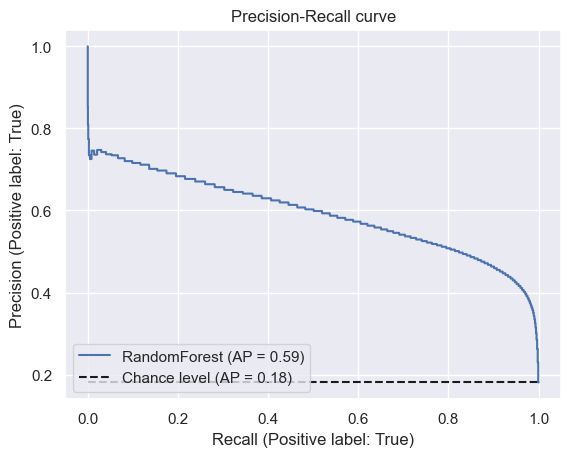

In [58]:
y_probs = pd.Series(clf.predict_proba(X_test)[:,1], index=test_df.index)

APS = average_precision_score(y_test, y_probs)

print('Average Precision Score over {} samples for year {} is: {}'.format(len(y_test), ' '.join([str(year) for year in test_years]), round(APS, 4)))

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="RandomForest", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

In [59]:
y_probs.to_pickle("{}/model_predictions/RF_predicted_probs_train_{}_test_{}.pkl".format(scope, '_'.join([str(year) for year in train_years]), '_'.join([str(year) for year in test_years])))

---

# TESTS

In [10]:
# Save the model to a temporary file
joblib.dump(clf, 'model_new.pkl')
clf_new = joblib.load('model_new.pkl')